In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, LSTM
from tensorflow.keras import preprocessing
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
(X_train, y_train) , (X_test, y_test) = imdb.load_data()

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
print('훈련용 리뷰 개수: ', len(X_train))
print('test용 리뷰 개수: ', len(X_test))

num_classes = len(set(y_train))
print('카테고리: ', num_classes)

훈련용 리뷰 개수:  25000
test용 리뷰 개수:  25000
카테고리:  2


In [ ]:
print('첫번째 훈련용 리뷰: ', X_train[0])
print('첫번째 훈련용 리뷰의 레이블: ', y_train[0])

첫번째 훈련용 리뷰:  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
첫번째 훈련용 리뷰의 레이블:  1


In [ ]:
word2id = imdb.get_word_index()
id2word = {word:id for id, word in word2id.items()}

# id에 mapping된 word 출력하기
for i in range(1, 21):
  print(id2word[i], end = '/')

1641221/1641221 [==============================] - 0s 0us/step
the/and/a/of/to/is/br/in/it/i/this/that/was/as/for/with/movie/but/film/on/

In [ ]:
dic_siz = 10000
sample_siz = 512

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = dic_siz)

In [ ]:
embed_space_dim = 16 #임베딩 차원: 16차원

# padding
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen = sample_siz)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen = sample_siz)

In [ ]:
# model
embed = Sequential()
embed.add(Embedding(input_dim = dic_siz, output_dim = embed_space_dim, input_length = sample_siz))
embed.add(Flatten())
embed.add(Dense(32, activation='relu'))
embed.add(Dense(1, activation = 'sigmoid'))
embed.compile(loss = 'binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
hist = embed.fit(x_train, y_train, epochs = 20, batch_size = 64, validation_data = (x_test, y_test), verbose=2)

Epoch 1/20
391/391 - 5s - loss: 0.4347 - accuracy: 0.7769 - val_loss: 0.2830 - val_accuracy: 0.8820 - 5s/epoch - 12ms/step
Epoch 2/20
391/391 - 5s - loss: 0.1611 - accuracy: 0.9411 - val_loss: 0.3049 - val_accuracy: 0.8768 - 5s/epoch - 13ms/step
Epoch 3/20
391/391 - 4s - loss: 0.0563 - accuracy: 0.9852 - val_loss: 0.3702 - val_accuracy: 0.8688 - 4s/epoch - 11ms/step
Epoch 4/20
391/391 - 4s - loss: 0.0143 - accuracy: 0.9979 - val_loss: 0.4371 - val_accuracy: 0.8688 - 4s/epoch - 10ms/step
Epoch 5/20
391/391 - 4s - loss: 0.0036 - accuracy: 0.9998 - val_loss: 0.5252 - val_accuracy: 0.8614 - 4s/epoch - 9ms/step
Epoch 6/20
391/391 - 3s - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.5251 - val_accuracy: 0.8682 - 3s/epoch - 9ms/step
Epoch 7/20
391/391 - 3s - loss: 7.2521e-04 - accuracy: 1.0000 - val_loss: 0.5513 - val_accuracy: 0.8684 - 3s/epoch - 9ms/step
Epoch 8/20
391/391 - 5s - loss: 4.5527e-04 - accuracy: 1.0000 - val_loss: 0.5751 - val_accuracy: 0.8686 - 5s/epoch - 12ms/step
Epoch 9/20


In [ ]:
# check model
embed.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 512, 16)           160000    
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                262176    
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 422209 (1.61 MB)
Trainable params: 422209 (1.61 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 0: loss / 1: Accuracy
res = embed.evaluate(x_test, y_test, verbose = 0)
print("Accuracy: ", res[1] * 100)
print('Loss: ', res[0])

Accuracy:  86.88799738883972
Loss:  0.7736253142356873


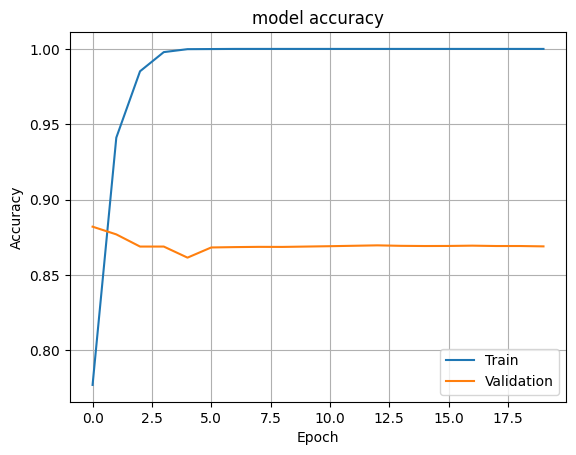

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

In [ ]:
# LSTM로 모델 분류하기
early = EarlyStopping(monitor = 'val_accuracy', patience = 5, restore_best_weights=True)

# LSTM
embed2 =Sequential()
embed2.add(Embedding(input_dim = dic_siz, output_dim = embed_space_dim, input_length = sample_siz))
embed2.add(LSTM(units = 32))
embed2.add(Dense(1, activation = 'sigmoid'))
embed2.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

hist2 = embed2.fit(x_train, y_train, epochs = 20, batch_size = 64, validation_split=0.2, verbose = 2, callbacks=[early])

Epoch 1/20
313/313 - 59s - loss: 0.4724 - accuracy: 0.7739 - val_loss: 0.3615 - val_accuracy: 0.8506 - 59s/epoch - 189ms/step
Epoch 2/20
313/313 - 58s - loss: 0.2636 - accuracy: 0.8991 - val_loss: 0.2898 - val_accuracy: 0.8834 - 58s/epoch - 186ms/step
Epoch 3/20
313/313 - 60s - loss: 0.2126 - accuracy: 0.9202 - val_loss: 0.3008 - val_accuracy: 0.8842 - 60s/epoch - 190ms/step
Epoch 4/20
313/313 - 59s - loss: 0.1493 - accuracy: 0.9481 - val_loss: 0.3412 - val_accuracy: 0.8750 - 59s/epoch - 189ms/step
Epoch 5/20
313/313 - 56s - loss: 0.1282 - accuracy: 0.9560 - val_loss: 0.3658 - val_accuracy: 0.8648 - 56s/epoch - 180ms/step
Epoch 6/20
313/313 - 63s - loss: 0.1028 - accuracy: 0.9669 - val_loss: 0.4033 - val_accuracy: 0.8618 - 63s/epoch - 200ms/step
Epoch 7/20
313/313 - 56s - loss: 0.0919 - accuracy: 0.9706 - val_loss: 0.4314 - val_accuracy: 0.8744 - 56s/epoch - 178ms/step
Epoch 8/20
313/313 - 60s - loss: 0.0712 - accuracy: 0.9768 - val_loss: 0.4536 - val_accuracy: 0.8694 - 60s/epoch - 190

In [ ]:
embed2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 512, 16)           160000    
                                                                 
 lstm_1 (LSTM)               (None, 32)                6272      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 166305 (649.63 KB)
Trainable params: 166305 (649.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Accuracy:  87.28799819946289
Loss:  0.3259631395339966


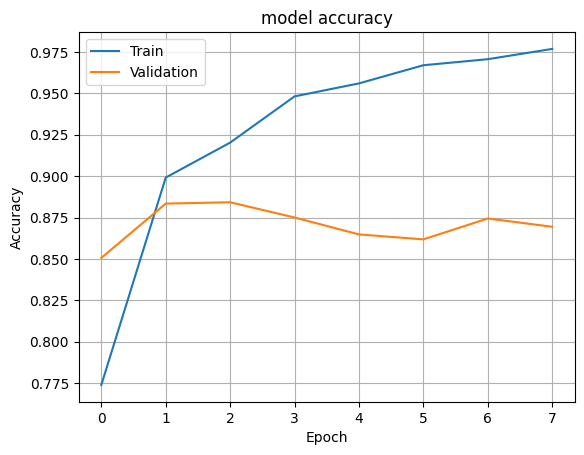

In [ ]:
# 0: loss / 1: Accuracy
res = embed2.evaluate(x_test, y_test, verbose = 0)
print("Accuracy: ", res[1] * 100)
print('Loss: ', res[0])

plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

In [2]:
from urllib.request import urlretrieve, urlopen
import gzip
import zipfile
import numpy as np
from scipy.spatial import distance

urlretrieve("http://nlp.stanford.edu/data/glove.6B.zip", filename ='glove.6B.zip')
zf = zipfile.ZipFile('glove.6B.zip')
zf.extractall()
zf.close()

In [3]:
dictionary = {}
f = open('glove.6B.100d.txt', encoding = 'utf8')

for line in f:
  word_vector = line.split()
  word = word_vector[0] # 가장 첫 번째 단어벡터 가져오기

  # 자신을 제외한 뒤의 단어 벡터들 가져오기
  word_vector_arr = np.asarray(word_vector[1:], dtype='float32')
  # 단어와 그에 매칭된 단어들의 벡터 나머지를 지정
  dictionary[word] = word_vector_arr

f.close()

print('단어 임베딩의 수:', len(dictionary))

단어 임베딩의 수: 400000


In [4]:
print(dictionary['class'])
print('벡터의 차원 수:', len(dictionary['class']))

[ 0.44507    1.1348     0.33681    0.033357  -1.0405     0.24413
  0.43113    0.041197  -0.81321    1.1462    -0.041166  -0.56681
 -0.37751    0.010833  -0.49384   -0.98461    0.2911     0.62519
  0.0021157  0.076011   0.57661   -0.42666    0.026943  -0.31422
  0.22591   -0.40706   -0.44773   -0.46698    0.071828   0.087351
 -0.25286    1.0292    -0.17695   -0.57001    0.69949    0.49922
 -0.23905    0.21815    0.067587   0.91464   -0.62297   -0.85661
 -0.1409    -0.61247    0.66159    0.090501   0.19563    0.35387
  0.18804    0.30706   -0.73807    0.019089  -0.32798    0.51793
 -0.003088  -1.7927     0.08279   -0.13564    2.0857     0.16076
 -0.41443    0.42641    0.055687   0.03359    0.74283   -0.19547
  0.53011    0.19503    0.44296    0.54503   -0.030984  -0.49682
 -0.11398    0.085998  -0.046392   0.92739    0.088696  -0.28703
 -0.72927   -1.1755    -0.26028   -0.55622   -0.026987  -0.20324
 -0.81465   -0.12299   -1.1006    -1.5845    -0.18962   -0.32423
 -0.99665   -0.060921   

In [5]:
# 가장 가까운 단어 찾기
def find_closest_words(vector):
  return sorted(dictionary.keys(), key = lambda w: distance.euclidean(dictionary[w], vector))

In [6]:
# 가장 가까운 단어 찾기
print(find_closest_words(dictionary['movie'])[:5])
print(find_closest_words(dictionary['school'])[:5])
print(find_closest_words(dictionary['oak'])[:5])

# 단어 추론해보기
print(find_closest_words((dictionary['seoul']) - dictionary['korea']+ dictionary['spain'])[:5])
print(find_closest_words((dictionary['animal']) - dictionary['lion']+ dictionary['oak'])[:5])
print(find_closest_words((dictionary['queen']) - dictionary['king']+ dictionary['actress'])[:5])

['movie', 'film', 'movies', 'films', 'hollywood']
['school', 'college', 'schools', 'elementary', 'students']
['oak', 'pine', 'cedar', 'walnut', 'grove']
['madrid', 'spain', 'santiago', 'seville', 'valencia']
['oak', 'trees', 'woodland', 'wood', 'organic']
['actress', 'actresses', 'dancer', 'actor', 'comedienne']
